In [1]:
import numpy as np
#import modin.pandas as pd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

import gc

In [2]:
time_resolution = 1

data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+str(time_resolution)+'/'

c_path = './network_data'+str(time_resolution)+'/commits/'
e_path = './network_data'+str(time_resolution)+'/emails/'
mix_path = './network_data'+str(time_resolution)+'/mix/'
#c_path = './network_data/commits/'

df_tech_overlaps = pd.read_csv("./tech_overlaps_series"+str(time_resolution)+".csv")
df_tech_overlaps = pd.read_csv("./tech_overlaps_series"+str(time_resolution)+".csv")
df_mix_overlaps = pd.read_csv("./mix_overlaps_series"+str(time_resolution)+".csv")

projects = os.listdir(c_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

projects = os.listdir(e_path)
project_names = [x.split('__')[0] for x in projects]
project_names_tech = pd.Series(project_names).drop_duplicates().values

In [3]:
len(df_tech_overlaps)

5

In [4]:
df_tech_overlaps

,Kitty,Tika,Lucene.NET,Pivot,Slider,Streams,Gossip,Unomi,ODF Toolkit,Tephra,...,Wicket,Geode,WebWork 2,Ignite,Crunch,CommonsRDF,Directory,Kabuki,Concerted,Traffic Server
0,"[0.45454545454545453, 0.4, 0.0, 0.333333333333...","[0.0, 0.0, 0.0, 0.5714285714285714, 0.25263157...","[0.1, 0.20588235294117646, 0.34146341463414637...","[0.355359765051395, 0.2285012285012285, 0.6407...","[0.07920792079207921, 0.22727272727272727, 0.3...","[0.0, 0.11538461538461539, 0.45454545454545453...","[0.0, 0.2631578947368421, 0.0, 0.0, 0.53846153...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.5, 0.7142857142857...","[0.5845070422535211, 0.0, 0.5666666666666667, ...","[0.0, 0.0, 0, 0.0, 0.0, 0, 0.0, 1.0, 0.1764705...",...,[1.0],"[0.0, 0.0, 0.18518518518518517, 0.191693290734...","[0.20816326530612245, 0.030303030303030304, 0....","[0, 0, 0.08620689655172414]","[0.8461538461538461, 0.11612903225806452, 0.06...",[],[1.0],[],[0.34782608695652173],[1.0]
1,"[0.4, 0.0, 0.0, 0.3333333333333333, 0.2, 0.0, ...","[0.0, 0.0, 0.0, 0.38095238095238093, 0.0315789...","[0.05, 0.12195121951219512, 0.0162601626016260...","[0.12530712530712532, 0.2740740740740741, 0.2,...","[0.1, 0.12727272727272726, 0.12345679012345678...","[0.0, 0.045454545454545456, 0.0, 0, 0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.15384615384615385, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, ...","[0.0, 0.0, 0.022222222222222223, 0.0, 0.0, 0.0...","[0.0, 0, 0, 0.0, 0, 0, 0.0, 0.0, 0.11111111111...",...,[],"[0.0, 0.0, 0.06349206349206349, 0.082677165354...","[0.0163265306122449, 0.006060606060606061]","[0, 0]","[0.14423076923076922, 0.04861111111111111, 0.0...",[],[],[],[],[]
2,"[0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.05, 0.016260162601626018, 0.04, 0.0, 0.0, 0...","[0.14814814814814814, 0.1259259259259259, 0.15...","[0.08181818181818182, 0.06363636363636363, 0.0...","[0.0, 0.0, 0, 0, 0, 0.0, 0.3333333333333333, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0...","[0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",...,[],"[0.0, 0.0, 0.0582010582010582, 0.0314960629921...",[0.004081632653061225],[0],"[0.028846153846153848, 0.024793388429752067, 0...",[],[],[],[],[]
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.05, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.07037037037037037, 0.096, 0.132, 0.14, 0.11...","[0.05454545454545454, 0.05454545454545454, 0.0...","[0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0.0...","[0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....",...,[],"[0.0, 0.0, 0.031746031746031744]",[],[],"[0.009615384615384616, 0.0, 0.0, 0.0]",[],[],[],[],[]
4,"[0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.06, 0.08, 0.112, 0.1, 0.116]","[0.045454545454545456, 0.00909090909090909, 0....","[0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0,...",...,[],"[0.0, 0.0]",[],[],"[0.0, 0.0, 0.0]",[],[],[],[],[]


In [5]:
arr_overlap = df_tech_overlaps.iloc[0].apply(lambda x: eval(x)).values.tolist()
arr_overlap

[[0.45454545454545453,
  0.4,
  0.0,
  0.3333333333333333,
  0.6,
  0.05555555555555555,
  0.0,
  0.0,
  0,
  0.14285714285714285,
  0.0,
  0],
 [0.0,
  0.0,
  0.0,
  0.5714285714285714,
  0.25263157894736843,
  0.13793103448275862,
  0.0603448275862069,
  0.0625,
  0.056179775280898875,
  0.25,
  0.20588235294117646,
  0.0,
  0.0,
  0.0,
  0.75,
  1.0],
 [0.1,
  0.20588235294117646,
  0.34146341463414637,
  0.04744525547445255,
  0.04,
  0.1262135922330097,
  0.03278688524590164,
  0.0,
  0.0,
  0.001287001287001287,
  0.0,
  0.24528301886792453,
  0.2033898305084746,
  0.3142857142857143,
  0.01639344262295082,
  0.017391304347826087,
  0.08947368421052632],
 [0.355359765051395,
  0.2285012285012285,
  0.6407407407407407,
  0.17611026033690658,
  0.392,
  0.41448692152917505,
  0.23744911804613297,
  0.2691588785046729,
  1.0],
 [0.07920792079207921,
  0.22727272727272727,
  0.345679012345679,
  0.17866666666666667,
  0.31746031746031744,
  0.20477815699658702,
  0.016853932584269662

In [6]:
sum(arr_overlap, [])

[0.45454545454545453,
 0.4,
 0.0,
 0.3333333333333333,
 0.6,
 0.05555555555555555,
 0.0,
 0.0,
 0,
 0.14285714285714285,
 0.0,
 0,
 0.0,
 0.0,
 0.0,
 0.5714285714285714,
 0.25263157894736843,
 0.13793103448275862,
 0.0603448275862069,
 0.0625,
 0.056179775280898875,
 0.25,
 0.20588235294117646,
 0.0,
 0.0,
 0.0,
 0.75,
 1.0,
 0.1,
 0.20588235294117646,
 0.34146341463414637,
 0.04744525547445255,
 0.04,
 0.1262135922330097,
 0.03278688524590164,
 0.0,
 0.0,
 0.001287001287001287,
 0.0,
 0.24528301886792453,
 0.2033898305084746,
 0.3142857142857143,
 0.01639344262295082,
 0.017391304347826087,
 0.08947368421052632,
 0.355359765051395,
 0.2285012285012285,
 0.6407407407407407,
 0.17611026033690658,
 0.392,
 0.41448692152917505,
 0.23744911804613297,
 0.2691588785046729,
 1.0,
 0.07920792079207921,
 0.22727272727272727,
 0.345679012345679,
 0.17866666666666667,
 0.31746031746031744,
 0.20477815699658702,
 0.016853932584269662,
 0.1,
 0.29545454545454547,
 0.12142857142857143,
 0.2238805970

In [7]:
all_graduated = np.load('all_graduated.npy').tolist()
all_retired = np.load('all_retired.npy').tolist()

In [8]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(len(df_tech_overlaps))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_overlaps_retired = df_tech_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_overlaps_retired.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_retired.append(data_thistime)


labels_time = [x+1 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[0, 1, 2, 3, 4]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

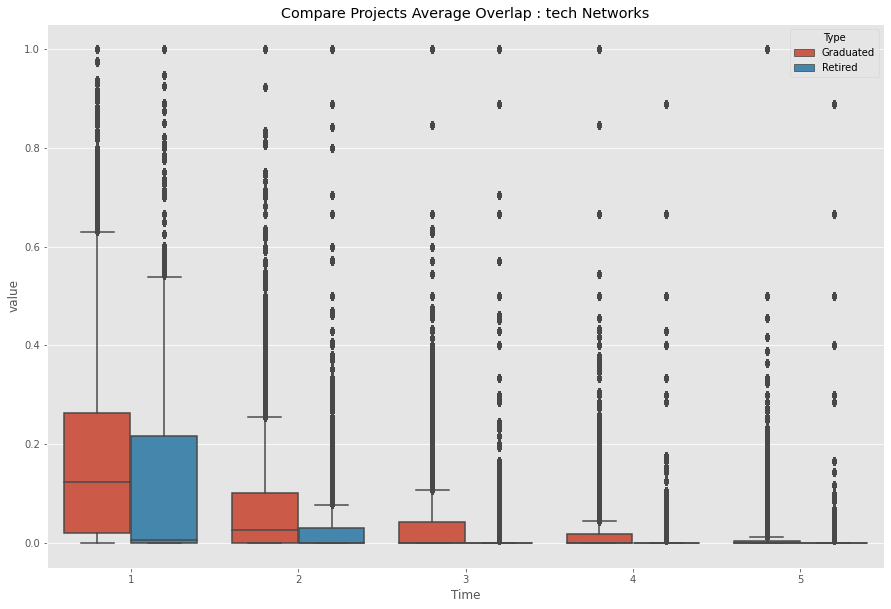

In [9]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : tech Networks")

<AxesSubplot:xlabel='Time', ylabel='value'>

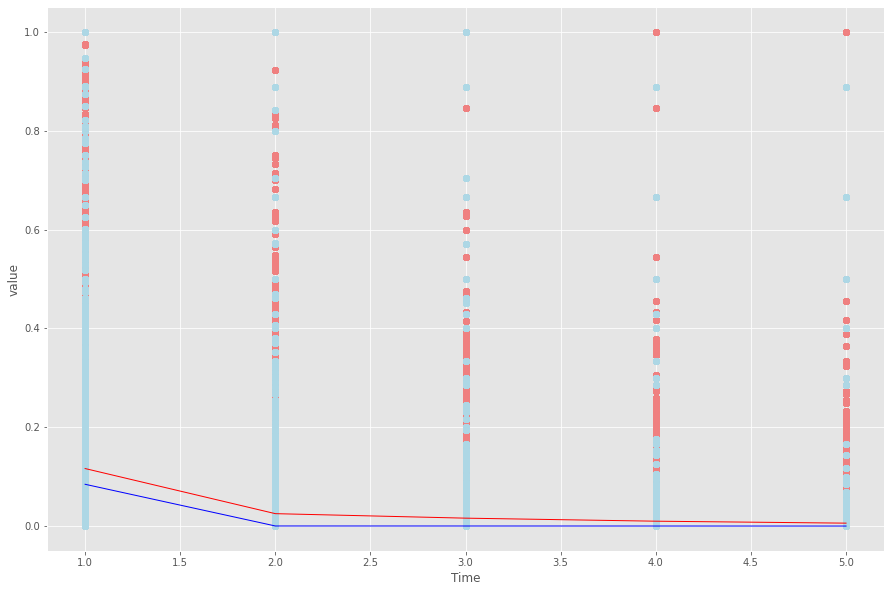

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.regplot(x=dd[dd['Type']=='Graduated']['Time'], y=dd[dd['Type']=='Graduated']['value'], lowess=True, color="lightcoral", 
            line_kws={"color":"red", "linewidth": 1})
sns.regplot(x=dd[dd['Type']=='Retired']['Time'], y=dd[dd['Type']=='Retired']['value'], lowess=True, color="lightblue", 
            line_kws={"color":"blue", "linewidth": 1})

In [11]:
dd

,Time,Type,value
0,1,Graduated,0
1,1,Graduated,0
2,1,Graduated,0
3,1,Graduated,0
4,1,Graduated,0
...,...,...,...
32578185,5,Retired,0.0
32578186,5,Retired,0.166667
32578187,5,Retired,0.666667
32578188,5,Retired,0.666667


In [12]:
gc.collect()

10

In [13]:
df_tech_overlaps_graduated = df_tech_overlaps[all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(len(df_tech_overlaps))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_overlaps_graduated.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})

df_tech_overlaps_retired = df_tech_overlaps[all_retired]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_overlaps_retired.loc[time].apply(lambda x: eval(x)).values.tolist()
    #data_thistime = remove_minus(data_thistime)
    data_thistime = sum(data_thistime,[])
    datas_t_retired.append(data_thistime)


labels_time = [x+1 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")
gc.collect()

[0, 1, 2, 3, 4]


0

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

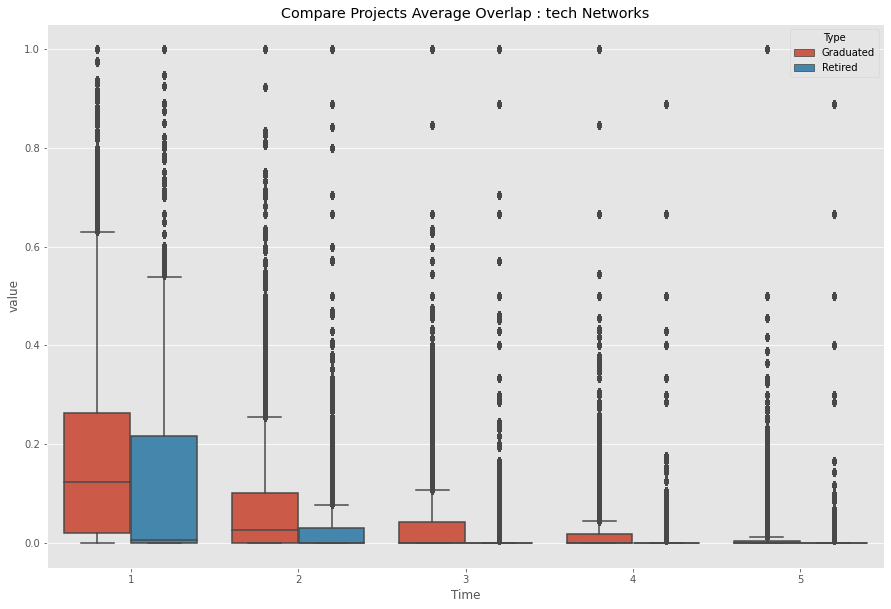

In [14]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')

plt.title("Compare Projects Average Overlap : tech Networks")

<AxesSubplot:xlabel='Time', ylabel='value'>

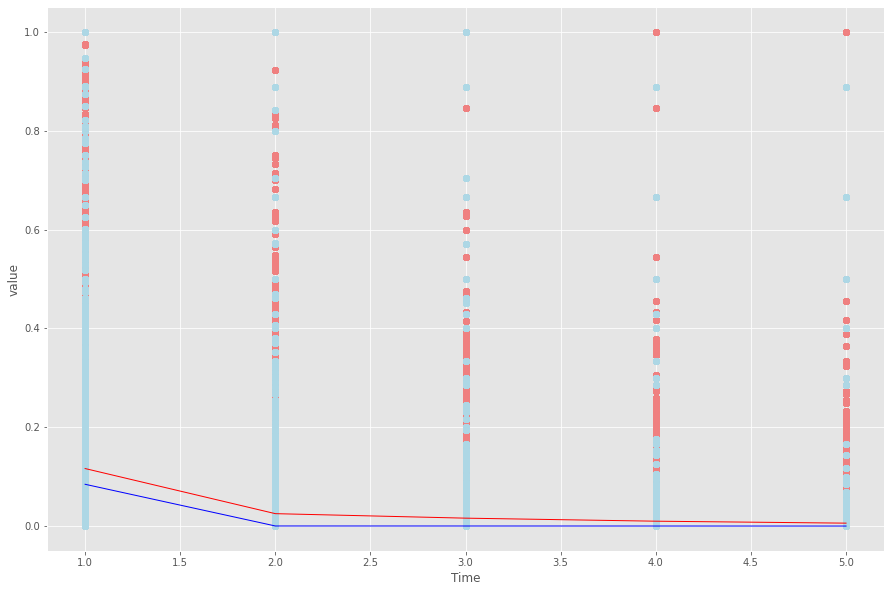

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.regplot(x=dd[dd['Type']=='Graduated']['Time'], y=dd[dd['Type']=='Graduated']['value'], lowess=True, color="lightcoral", 
            line_kws={"color":"red", "linewidth": 1})
sns.regplot(x=dd[dd['Type']=='Retired']['Time'], y=dd[dd['Type']=='Retired']['value'], lowess=True, color="lightblue", 
            line_kws={"color":"blue", "linewidth": 1})

In [16]:
gc.collect()

131